In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib
import matplotlib.pyplot as plt
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
names = ['fixed acidity','volatile acidity','citric acid','residual',
'sugar','chlorides','free sulfur dioxide','total sulfur', 'density', 'ph',
'sulfates', 'alcohol','quality']
dataset = pd.read_csv(r'/home/david/Documents/Cyber-AI/data/winequality-s.csv',names=names)

In [3]:
np.random.seed(0)
perm = np.random.permutation(2517)
x = dataset.iloc[:,0:11].values
y = dataset.iloc[:,11].values

In [4]:
@interact_manual( feature=IntSlider(min=0, max=10, step=1),
label=IntSlider(min=0,max=1,step=1))
def density_plot(feature, label):
 plt.hist(x[y==label,feature], density=True)
 #
 mu = np.mean(x[y==label,feature]) # mean
 var = np.var(x[y==label,feature]) # variance
 std = np.sqrt(var) # standard deviation
 #
 x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
 plt.plot(x_axis, norm.pdf(x_axis,mu,std), 'r', lw=2)
 plt.title("Quality "+str(label) )
 plt.xlabel(names[feature], fontsize=14, color='red')
 plt.ylabel('Density', fontsize=14, color='red')
 plt.show()

interactive(children=(IntSlider(value=0, description='feature', max=10), IntSlider(value=0, description='label…

In [5]:
def fit_generative_model(x,y,feature):
    k = 2 # number of classes
    mu = np.zeros(k) # list of means
    var = np.zeros(k) # list of variances
    pi = np.zeros(k) # list of class weights
    for label in [0,1]:
        indices = (y==label)
        mu[label] = np.mean(x[indices,feature])
        var[label] = np.var(x[indices,feature])
        pi[label] = float(sum(indices))/float(len(y))
    return mu, var, pi

@interact_manual( feature=IntSlider(0,0,10) )
def show_densities(feature):
    mu, var, pi = fit_generative_model(x, y, feature)
    colors = ['r', 'g']
    for classIndex in [0,1]:
        m = mu[classIndex]
        s = np.sqrt(var[classIndex])
        x_axis = np.linspace(m - 3*s, m+3*s, 1000)
        plt.plot(x_axis, norm.pdf(x_axis,m,s), colors[classIndex], label="class " +str(classIndex))
    plt.xlabel(names[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.legend()
    plt.show() 

interactive(children=(IntSlider(value=0, description='feature', max=10), Button(description='Run Interact', st…

In [26]:
val_size = 0.2
seed=7
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size=val_size, random_state=seed)
sc_x = StandardScaler()
xtrain_scaled = sc_x.fit_transform(xtrain)
xval_scaled = sc_x.transform(xval)

In [27]:
modelskNN=[]
modelskNN.append(('1', KNeighborsClassifier(n_neighbors=1)))
modelskNN.append(('3', KNeighborsClassifier(n_neighbors=3)))
modelskNN.append(('5', KNeighborsClassifier(n_neighbors=5)))

resultskNN = []
nameskNN=[]
kfold = StratifiedKFold(n_splits=5)

1: 0.785402 (0.021625)
3: 0.762059 (0.015312)
5: 0.752622 (0.016836)


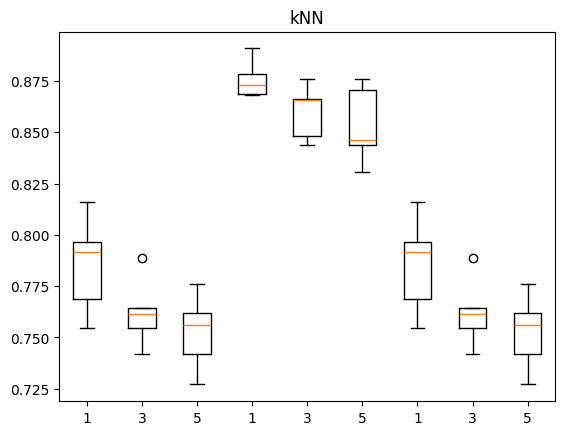

Mean: 0.7988138985250204 STD: 0.049947307676766355


In [50]:
# Unscaled Version
for name, model in modelskNN:
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    resultskNN.append(cv_results)
    nameskNN.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(resultskNN, labels=nameskNN)
plt.title('kNN')
plt.show() 

res = np.std(np.array(resultskNN))
mean = np.average(np.array(resultskNN))

print(f"Mean: {mean} STD: {res}")

1: 0.875802 (0.008383)
3: 0.859908 (0.012053)
5: 0.853450 (0.017093)


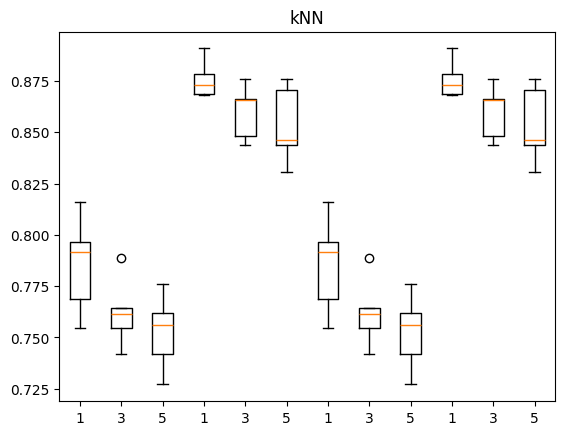

Mean: 0.8148737289565405 STD: 0.0520496895224955


In [51]:
# Scaled Version
for name, model in modelskNN:
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    resultskNN.append(cv_results)
    nameskNN.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(resultskNN, labels=nameskNN)
plt.title('kNN')
plt.show() 

res = np.std(np.array(resultskNN))
mean = np.average(np.array(resultskNN))

print(f"Mean: {mean} STD: {res}")

In [30]:
# 1 neighbour scaled performed best on training data
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(xtrain_scaled, ytrain)
predictions = kNN.predict(xval_scaled)
print(metrics.accuracy_score(yval, predictions))
print(metrics.confusion_matrix(yval, predictions)) 

0.878968253968254
[[249  36]
 [ 25 194]]


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.806254 (0.022867)


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.814699 (0.019828)


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.814197 (0.022941)


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.799788 (0.027103)


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.787866 (0.024775)


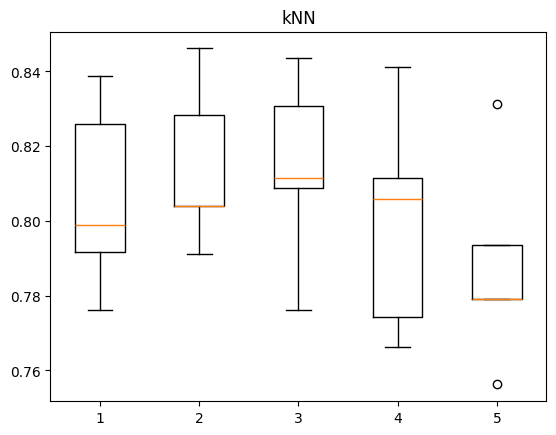

Mean: 0.8045608187351085 STD: 0.02565427788907058


In [52]:
# Unscaled Version
LR = LogisticRegression() 

degrees = [i for i in range(1, 6)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    xcurrent = poly.fit_transform(xtrain)
    # model = LR.fit(xcurrent,ytrain) 
    cv_results = cross_val_score(LR, xcurrent, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(degree))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

5: 0.815192 (0.015948)
5: 0.855935 (0.003205)


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.862889 (0.008253)


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.868353 (0.006892)


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

5: 0.867856 (0.004907)


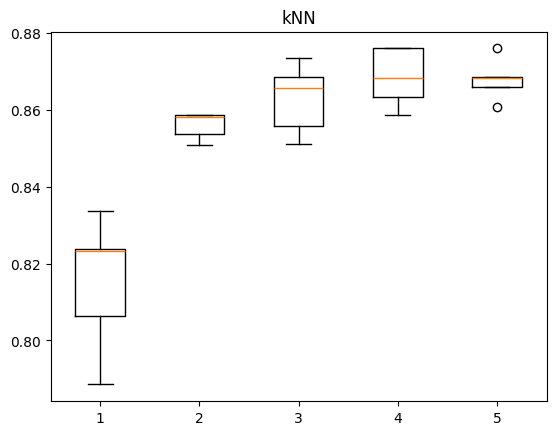

Mean: 0.8540449119168426 STD: 0.02186811309409223


In [53]:
LR = LogisticRegression() 

degrees = [i for i in range(1, 6)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    xcurrent = poly.fit_transform(xtrain_scaled)
    # model = LR.fit(xcurrent,ytrain) 
    cv_results = cross_val_score(LR, xcurrent, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(degree))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

In [34]:
# degree = 3 on scaled data provided maximum accuracy without overfitting
poly = PolynomialFeatures(degree=3)
xcurrent = poly.fit_transform(xtrain_scaled)
xvcurrent = poly.fit_transform(xval_scaled)
model = LR.fit(xcurrent,ytrain) 
predictions = model.predict(xvcurrent)
print(metrics.accuracy_score(yval, predictions))
print(metrics.confusion_matrix(yval, predictions)) 

0.8571428571428571
[[244  41]
 [ 31 188]]


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Unscaled Version
dt = DecisionTreeClassifier()

model = dt.fit(xtrain, ytrain)
predictions = model.predict(xval)
print(metrics.accuracy_score(yval, predictions))
print(metrics.confusion_matrix(yval, predictions)) 

0.8670634920634921
[[246  39]
 [ 28 191]]


In [38]:
# Scaled Version
dt = DecisionTreeClassifier()

model = dt.fit(xtrain_scaled, ytrain)
predictions = model.predict(xval_scaled)
print(metrics.accuracy_score(yval, predictions))
print(metrics.confusion_matrix(yval, predictions)) 

0.8392857142857143
[[241  44]
 [ 37 182]]


5: 0.897169 (0.011501)
5: 0.894679 (0.009829)
5: 0.903130 (0.010313)
5: 0.899151 (0.015164)
5: 0.900635 (0.012163)
5: 0.909581 (0.009036)
5: 0.903615 (0.014523)
5: 0.903617 (0.014593)
5: 0.904610 (0.012320)
5: 0.903120 (0.015550)
5: 0.903631 (0.007713)
5: 0.905613 (0.011125)
5: 0.906106 (0.012359)
5: 0.905110 (0.015957)
5: 0.909589 (0.008096)
5: 0.901635 (0.012484)
5: 0.908095 (0.007066)
5: 0.907596 (0.012941)
5: 0.904616 (0.013239)


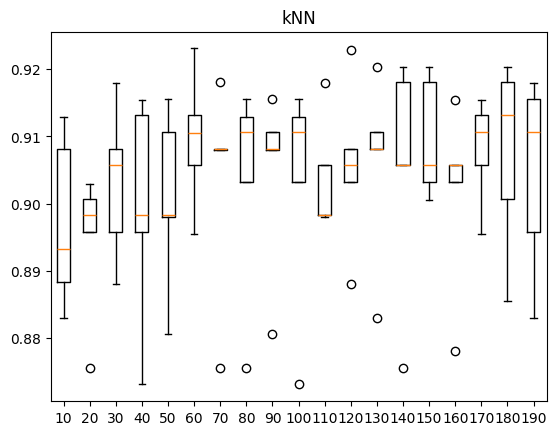

Mean: 0.903752362648037 STD: 0.012758540313198048


In [54]:
# Unscaled version
trees = [i*10 for i in range(1, 20)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for tree in trees:
    model = RandomForestClassifier(n_estimators=tree)
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(tree))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

5: 0.885235 (0.015670)
5: 0.897666 (0.005738)
5: 0.905607 (0.014451)
5: 0.901637 (0.010866)
5: 0.901136 (0.011758)
5: 0.900147 (0.010380)
5: 0.901641 (0.008540)
5: 0.904122 (0.016548)
5: 0.907100 (0.012472)
5: 0.902625 (0.013894)
5: 0.905110 (0.008158)
5: 0.902131 (0.011559)
5: 0.900144 (0.011747)
5: 0.906599 (0.011898)
5: 0.904620 (0.008985)
5: 0.904121 (0.011207)
5: 0.904118 (0.013615)
5: 0.906600 (0.012496)
5: 0.901635 (0.010061)


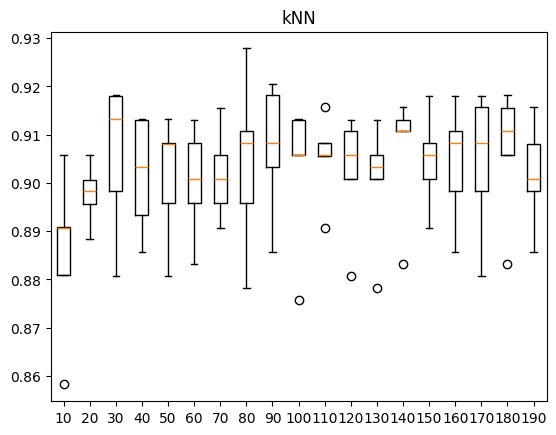

Mean: 0.9022100545983678 STD: 0.012761636711957479


In [55]:
# Scaled version
trees = [i*10 for i in range(1, 20)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for tree in trees:
    model = RandomForestClassifier(n_estimators=tree)
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(tree))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

In [41]:
# 40 trees unscaled performed best on training data
mode = RandomForestClassifier(n_estimators=40)
model.fit(xtrain, ytrain)
predictions = model.predict(xval)
print(metrics.accuracy_score(yval, predictions))
print(metrics.confusion_matrix(yval, predictions)) 

0.9067460317460317
[[260  25]
 [ 22 197]]


5: 0.676097 (0.014868)
5: 0.689992 (0.021787)
5: 0.698446 (0.012379)
5: 0.705404 (0.009844)
5: 0.715336 (0.012044)
5: 0.719805 (0.013872)
5: 0.725768 (0.011940)
5: 0.730240 (0.011716)
5: 0.734711 (0.011886)
5: 0.737199 (0.009609)


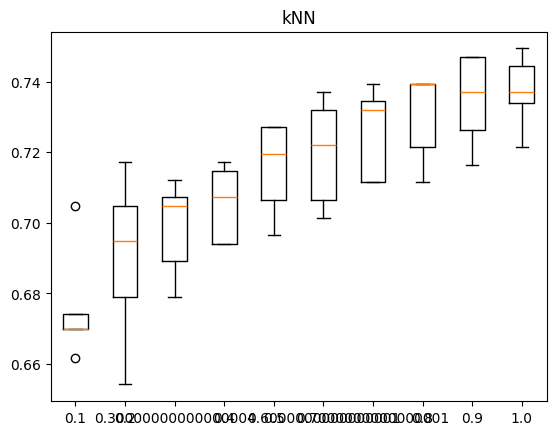

Mean: 0.7132997543300865 STD: 0.02350655343676119


In [56]:
# Unscaled rbf version
Cs = [i*0.1 for i in range(1, 11)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for C in Cs:
    model = SVC(C=C, kernel="rbf")
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(C))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

5: 0.839537 (0.018557)
5: 0.857418 (0.012240)
5: 0.860894 (0.011774)
5: 0.860398 (0.011914)
5: 0.862879 (0.012642)
5: 0.861887 (0.010978)
5: 0.862382 (0.011761)
5: 0.864864 (0.012681)
5: 0.868842 (0.009751)
5: 0.867848 (0.009756)


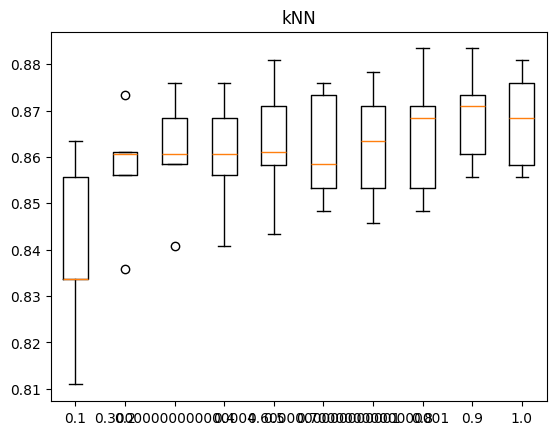

Mean: 0.860694789081886 STD: 0.014652528289191363


In [57]:
# Scaled rbf version
Cs = [i*0.1 for i in range(1, 11)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for C in Cs:
    model = SVC(C=C, kernel="rbf")
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(C))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

5: 0.818176 (0.022556)
5: 0.818672 (0.019232)
5: 0.821156 (0.018509)
5: 0.821651 (0.020749)
5: 0.821651 (0.019651)
5: 0.823637 (0.020134)
5: 0.822645 (0.019479)
5: 0.824631 (0.021125)
5: 0.823637 (0.020073)
5: 0.825126 (0.021542)


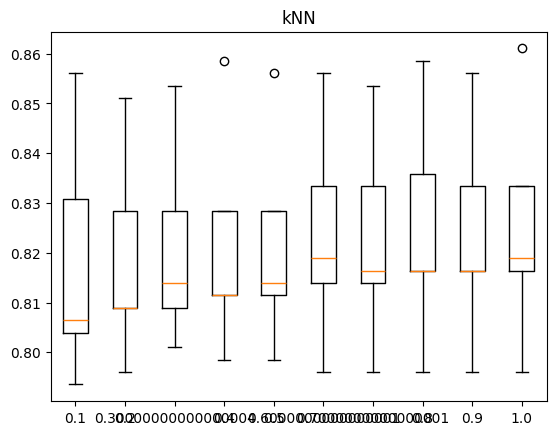

Mean: 0.8220983173462711 STD: 0.020457174114766965


In [58]:
# Unscaled linear version
Cs = [i*0.1 for i in range(1, 11)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for C in Cs:
    model = SVC(C=C, kernel="linear")
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(C))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

5: 0.826124 (0.022331)
5: 0.824635 (0.021744)
5: 0.822650 (0.019700)
5: 0.825135 (0.019816)
5: 0.825135 (0.020548)
5: 0.824637 (0.019943)
5: 0.824639 (0.019372)
5: 0.826127 (0.020819)
5: 0.825135 (0.020548)
5: 0.825631 (0.020299)


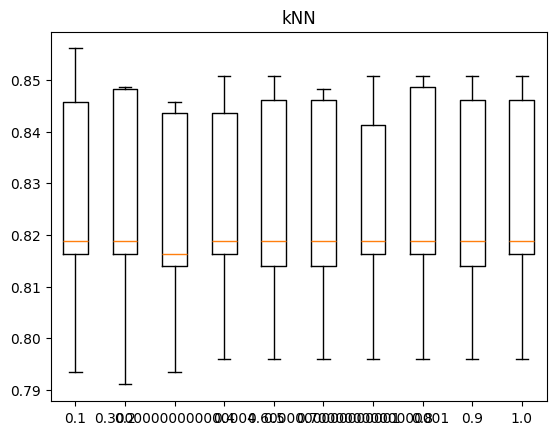

Mean: 0.8249847536510992 STD: 0.020552404873074782


In [59]:
# Scaled linear version
Cs = [i*0.1 for i in range(1, 11)]

results = []
names = []
kfold = StratifiedKFold(n_splits=5)

for C in Cs:
    model = SVC(C=C, kernel="linear")
    cv_results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(str(C))
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('kNN')
plt.show() 

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

In [49]:
# C=0.9 scaled rbf performed best on training data
mode = SVC(C=0.9, kernel="rbf")
model.fit(xtrain_scaled, ytrain)
predictions = model.predict(xval_scaled)
print(metrics.accuracy_score(yval, predictions))
print(metrics.confusion_matrix(yval, predictions)) 

0.8115079365079365
[[240  45]
 [ 50 169]]


In [60]:
kfold=10

In [66]:
# 1 neighbour scaled performed best on training data
kNN = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

Mean: 0.8579109403477663 STD: 0.02726791366070644


In [73]:
# degree = 3 on scaled data provided maximum accuracy without overfitting
poly = PolynomialFeatures(degree=3)
xcurrent = poly.fit_transform(xtrain_scaled)
xvcurrent = poly.fit_transform(xval_scaled)
results = cross_val_score(LR, xtrain, ytrain, cv=kfold, scoring='accuracy')

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Mean: 0.8042756514457416 STD: 0.03144627653302671


/home/david/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# Unscaled Version
dt = DecisionTreeClassifier()

model = dt.fit(xtrain, ytrain)
results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

Mean: 0.8588985764248067 STD: 0.02373385414395734


In [69]:
# 40 trees unscaled performed best on training data
mode = RandomForestClassifier(n_estimators=40)
model.fit(xtrain, ytrain)
results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

Mean: 0.8584010639869957 STD: 0.02154278195473936


In [71]:
# C=0.9 scaled rbf performed best on training data
mode = SVC(C=0.9, kernel="rbf")
results = cross_val_score(model, xtrain_scaled, ytrain, cv=kfold, scoring='accuracy')

res = np.std(np.array(results))
mean = np.average(np.array(results))

print(f"Mean: {mean} STD: {res}")

Mean: 0.8584059898527168 STD: 0.026180478154560694
